# Estatística 1: **FREQUENCIAS E MEDIDAS**

In [3]:
### Importação de bibliotecas

### Bibliotecas base
import pandas as pd
import numpy as np
### Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
### Bibliotecas para estatística
import scipy.stats as stat
### Bibliotecas para importar datasets
!pip install pydataset
from pydataset import data


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 9.7 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939418 sha256=9565bf213d969ddfba02abdeafd0fa0df9bcbbc8f4033c810e36fadbe396198c
  Stored in directory: /Users/isabellastersa/Library/Caches/pip/wheels/29/93/3f/af54c413cecaac292940342c61882d2a8848674175d0bb0889
Successfully built pydataset
initiated datasets repo at: /Users/isabellastersa/.pydataset/


## Extração dos dados

Nessa etapa, iremos importar os dados necessários para o projeto e realizar uma análise exploratória inicial para entender as características e estrutura do dataset.

In [5]:
# Leitura do dataset
df_forbes = data('Forbes2000')

In [6]:
# Verificando as 5 primeiras linhas do dataset
df_forbes.head()

,rank,name,country,category,sales,profits,assets,marketvalue
1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54


In [7]:
# Fazendo um diagnóstico inicial do dataset: número de linhas, número de colunas, tipo dos dados, contagem de NAs
df_forbes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         2000 non-null   int64  
 1   name         2000 non-null   object 
 2   country      2000 non-null   object 
 3   category     2000 non-null   object 
 4   sales        2000 non-null   float64
 5   profits      1995 non-null   float64
 6   assets       2000 non-null   float64
 7   marketvalue  2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 140.6+ KB


In [11]:
# Resumo estatístico de todas as colunas do dataset
# Não consideramos as duas primeiras colunas pois são identificadores
df_forbes.iloc[:,2:].describe(include = 'all')

,country,category,sales,profits,assets,marketvalue
count,2000,2000,2000.000000,1995.000000,2000.000000,2000.000000
unique,61,27,NaN,NaN,NaN,NaN
top,United States,Banking,NaN,NaN,NaN,NaN
freq,751,313,NaN,NaN,NaN,NaN
mean,NaN,NaN,9.697010,0.381133,34.041850,11.877655
std,NaN,NaN,18.002592,1.765454,99.678786,24.460197
min,NaN,NaN,0.010000,-25.830000,0.270000,0.020000
25%,NaN,NaN,2.017500,0.080000,4.025000,2.720000
50%,NaN,NaN,4.365000,0.200000,9.345000,5.150000
75%,NaN,NaN,9.547500,0.440000,22.792500,10.602500


## Análise exploratória de cada coluna

Nesta etapa, será realizada uma análise exploratória detalhada de cada coluna do dataset. Isso inclui a identificação de problemas específicos, como valores faltantes e inconsistências, além de entender a distribuição dos dados e avaliar a relevância e a cardinalidade de cada coluna. Essas ações são essenciais para garantir a qualidade dos dados e prepará-los adequadamente para análises mais avançadas.


As análises serão divididas em dois tipos:
1. **Análise de variáveis categóricas** (colunas: country e category)
2. **Análise de variáveis númericas** (colunas: sales, profits, assets e marketvalue)

### Análise de Variáveis Categóricas

A análise das variáveis categóricas será conduzida através das seguintes etapas:
1. **Cálculo da Moda:**
- **Descrição:** Identificação da categoria mais frequente em cada variável categórica. A moda fornece insights sobre qual categoria predomina nos dados.
2. **Contagem de Categorias:**
- **Descrição:** Determinação do número total de categorias únicas em cada variável. Isso ajuda a entender a diversidade e a complexidade das variáveis categóricas.
3. **Análise de Distribuição e Representatividade:**
- **Descrição:** Avaliação da frequência de ocorrência de cada categoria, incluindo a visualização da distribuição dessas frequências. Essa etapa é essencial para identificar categorias dominantes ou raramente representadas, permitindo uma compreensão mais clara de como as categorias se distribuem no dataset.
4. **Verificação de Valores Ausentes (NAs):**
- **Descrição:** Identificação e quantificação de valores ausentes nas variáveis categóricas. A presença de NAs pode indicar problemas nos dados que precisam ser tratados, seja por imputação, exclusão ou outro método adequado.


In [12]:
### Variável COUNTRY
# Cálculo da moda
df_forbes['country'].mode()

0    United States
Name: country, dtype: object

In [14]:
# Contagem de Categorias
df_forbes['country'].nunique()

61

In [15]:
# Análise de Distribuição e Representatividade
df_forbes['country'].value_counts()

country
United States                   751
Japan                           316
United Kingdom                  137
Germany                          65
France                           63
Canada                           56
South Korea                      45
Italy                            41
Australia                        37
Taiwan                           35
Switzerland                      34
Spain                            29
Netherlands                      28
India                            27
Sweden                           26
China                            25
Bermuda                          20
Hong Kong/China                  20
Mexico                           17
Malaysia                         16
Singapore                        16
Brazil                           15
South Africa                     15
Greece                           12
Turkey                           12
Russia                           12
Finland                          11
Denmark             

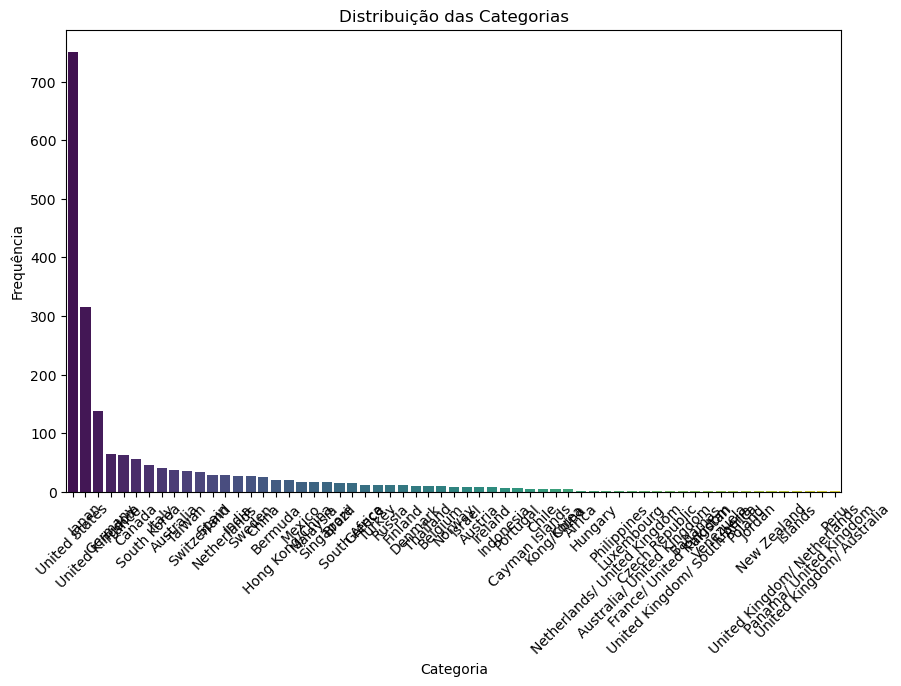

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=df_forbes,
              order=df_forbes['country'].value_counts().index,
              palette='viridis')

plt.title('Distribuição das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Verificação de NAs
na_country = df_forbes['country'].isna().sum() # Contagem
percentual_na_country = na_country * 100 / len(df_forbes) # Percentual

print(f'São {na_country} NAs, representando {percentual_na_country}% dos dados da variável country')

São 0 NAs, representando 0.0% dos dados da variável country


In [23]:
### Variável CATEGORY
# Cálculo da moda
df_forbes['category'].mode()

0    Banking
Name: category, dtype: object

In [24]:
# Contagem de Categorias
df_forbes['category'].nunique()

27

In [25]:
# Análise de Distribuição e Representatividade
df_forbes['category'].value_counts()

category
Banking                             313
Diversified financials              158
Insurance                           112
Utilities                           110
Materials                            97
Oil & gas operations                 90
Retailing                            88
Food drink & tobacco                 83
Transportation                       80
Construction                         79
Consumer durables                    74
Business services & supplies         70
Telecommunications services          67
Health care equipment & services     65
Media                                61
Technology hardware & equipment      59
Capital goods                        53
Chemicals                            50
Drugs & biotechnology                45
Household & personal products        44
Hotels restaurants & leisure         37
Food markets                         33
Conglomerates                        31
Software & services                  31
Semiconductors                 

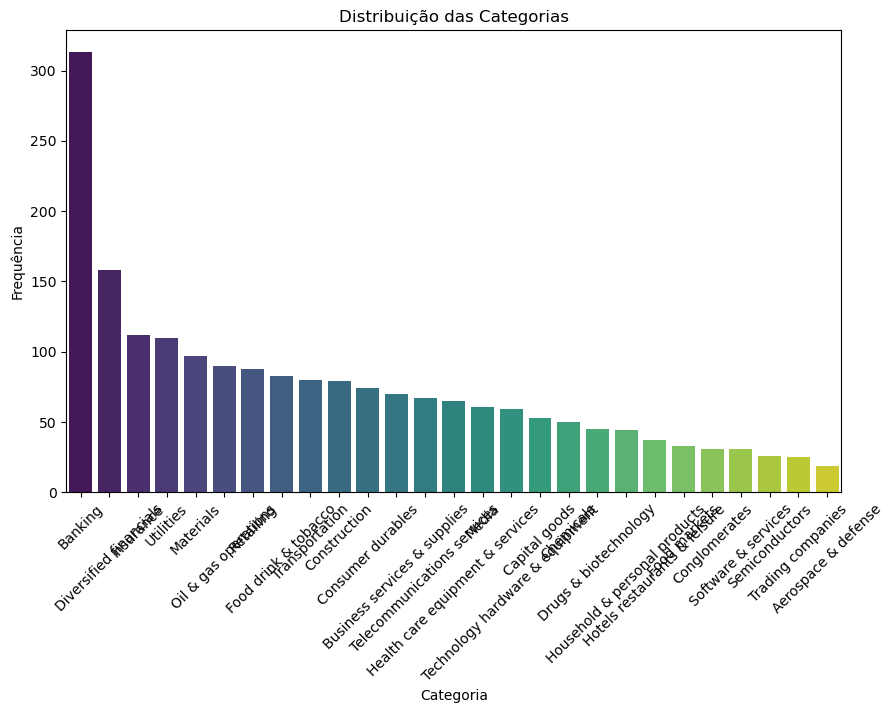

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df_forbes,
              order=df_forbes['category'].value_counts().index,
              palette='viridis')

plt.title('Distribuição das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Verificação de NAs
na_category = df_forbes['category'].isna().sum() # Contagem
percentual_na_category = na_category * 100 / len(df_forbes) # Percentual

print(f'São {na_category} NAs, representando {percentual_na_category}% dos dados da variável category')

São 0 NAs, representando 0.0% dos dados da variável category


### Análise de Variáveis Numéricas

A análise das variáveis numéricas será conduzida através das seguintes etapas:
1. **Medidas de Tendência central:**
- **Descrição:** Avaliam o centro da distribuição dos dados, fornecendo informações sobre o valor típico das variáveis. Inclui média, moda e mediana dos dados.
2. **Medidas de Dispersão**
- **Descrição:** Avaliam a variabilidade dos dados em torno da tendência central. Inclui variância, desvio padrão e intervalo de amplitude (valores máximo e mínimo) 
3. **Histograma:**
- **Descrição:** O histograma permite visualizar a frequência de diferentes intervalos de valores e identificar padrões na distribuição dos dados, como simetria, assimetria ou a presença de múltiplos picos.
5. **Boxplot**:
- **Descrição:** O boxplot exibe a distribuição dos dados através da mediana, quartis e possíveis outliers, facilitando a visualização da dispersão, centralidade e presença de valores extremos. Ele destaca a variação dos dados, mostrando a amplitude interquartil e os pontos fora da faixa dos bigodes, ajudando a identificar a simetria, assimetria e discrepâncias na distribuição.
6. **Verificação de Outliers:**
- **Descrição:** Identificação de valores que estão significativamente distantes dos outros dados. Utilizaremos o método IQR (Intervalo Interquartil)
7. **Verificação de Valores Ausentes (NAs):**
- **Descrição:** Identificação e quantificação de valores ausentes nas variáveis categóricas. A presença de NAs pode indicar problemas nos dados que precisam ser tratados, seja por imputação, exclusão ou outro método adequado.


In [29]:
### Váriavel SALES
# Medidas de Tendência Central
media_sales = df_forbes['sales'].mean()
mediana_sales = df_forbes['sales'].median()
moda_sales = df_forbes['sales'].mode()

print(f'Média de SALES: {media_sales:.2f}')
print(f'Mediana de SALES: {mediana_sales:.2f}')
if moda_sales.empty:
    print('Moda: amodal')
else:
    frequencias = df_forbes['sales'].value_counts()
    modas = [f'{valor:.2f}' for valor in moda_sales]
    frequencias_modas = [frequencias[valor] for valor in moda_sales]
    
    if len(moda_sales) == 1:
        print(f'Moda de SALES: {moda_sales[0]:.2f} com frequência de {frequencias_modas[0]}')
    else:
        modas_freq = ', '.join([f'{m} (frequência: {f})' for m, f in zip(modas, frequencias_modas)])
        print(f'A variável SALES apresenta os valores {modas_freq} como moda.')

Média de SALES: 9.70
Mediana de SALES: 4.37
Moda de SALES: 0.58


In [ ]:
### Váriavel PROFITS

In [ ]:
### Váriavel ASSETS

In [ ]:
### Váriavel MARKETVALUE